In [3]:
'''
One of the best but also more challenging ways to get insights from data is to visualize them. 
In this way, it is easier to identify patterns, grasp difficult concepts or draw the attention to key elements.

This Python 3 environment comes with many helpful analytics and graphic visualization libraries installed. 
We'll use three libraries for this session: matplotlib, seaborn and scikitlearn.

Matplotlib
Matplotlib is a Python plotting library that was released in 2003.
It produces publication quality figures in a variety of hardcopy formats. 
Matplotlib works under interactive environments across platforms, such as Python scripts, web application servers, 
and of course the jupyter notebook.
You can generate histograms, power spectrum, bar charts, error charts, scatterplots, etc., 
with just a few lines of code. For the power user, you have full control of line styles, font properties, 
axes properties, etc, via a set of functions.

Seaborn
Seaborn is a high level statistics visualization library based on matplotlib. 
It provides appealing default aesthetics and good color schemes. 
Although is based on matplotlib, Seaborn extends Matplotlib and addresses frustrations of working with Matplotlib. 
One of these hard things or frustrations had to do with the default Matplotlib parameters. 
Seaborn can with different parameters. It can take arbitrary Matplotlib keyword arguments too. 
In addition Seaborn aesthetics alter styling for Matplotlib plots. 
Seaborn’s function can return Matplotlib Figure and Axes object. 
And Seaborn really shines for its ability to visualize many different features at once.

Scikit learn
Scikit learn is a free software machine learning library for python programming language. 
It features various classification, regression and clustering algorithms including support vector machines (SVM), 
random forests, gradient boosting, k-means and Density-based spatial clustering of applications with noise (DBSCAN), 
and is designed to interoperate with the Python numerical and scientific libraries. 

Prepare Data
First, we'll import libraries include pandas. 
As introduced before, it is a data processing and CSV file I/O library; 
Seaborn and matplotlib.pyplot for graphing purpose, and some scikit learn modules 

'''

import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set(style="white", color_codes=True)
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
import sklearn.metrics as sm
import numpy as np
%matplotlib inline

# Then, we load iris dataset from scikit learn directly.
df = datasets.load_iris()


In [ ]:
list(df)

In [32]:
# Take a peek at the data
df.data.shape

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [33]:
'''
This data set consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) 
petal and sepal length, stored as a 150x4 array form in numpy. 

'''

df.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [35]:
# The rows being the samples and the columns being Sepal Length, Sepal Width, Petal Length and Petal Width.

df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
'''
Then we store the inputs as a Pandas Dataframe and set the column names

There are two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional). 
First we convert the dataset from array to structured panda data frame.

'''

iris = pd.DataFrame(df.data, columns=df.feature_names)
iris['target']=df.target

df.target_names

iris['species'] = iris['target'].map({0:df.target_names[0],1:df.target_names[1],2:df.target_names[2]})

In [14]:
#To see what's in the built up data frame with iris data, we can ask Jupyter notebooks to print first few lines of the data frame; 
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [42]:
# and each species has 50 lines
iris["species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

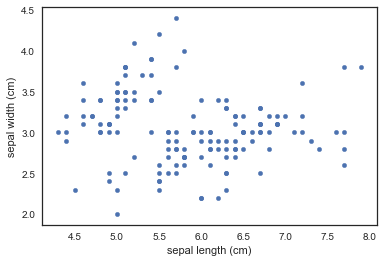

In [43]:
#The first way we can plot things is using the .plot extension from Pandas dataframes
#We'll use this to make a scatterplot of the Iris features.

iris.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")

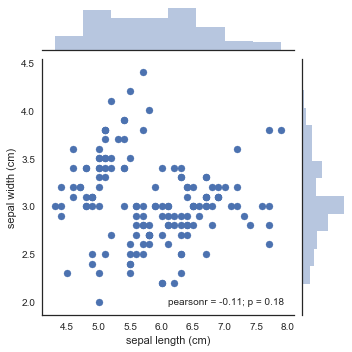

In [44]:
#The first way we can plot things is using the .plot extension from Pandas dataframes
#We'll use this to make a scatterplot of the Iris features.

sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=iris, size=5)

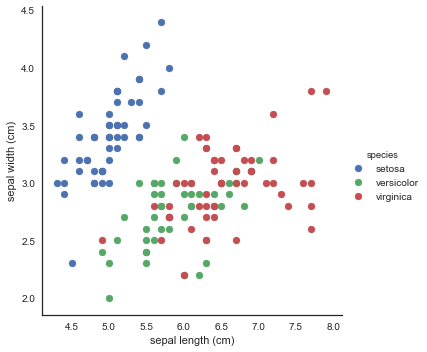

In [46]:
#One piece of information missing in the plots above is what species each plant is to plot labeled data, 
#we can choose use seaborn's FacetGrid by passing para hue='species' to color the scatterplot by species

ns.FacetGrid(iris, hue="species", size=5) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)")\
   .add_legend()

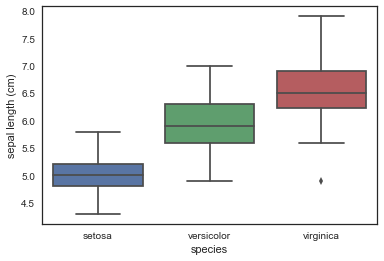

In [47]:
#One piece of information missing in the plots above is what species each plant is to plot labeled data, 
#we can choose use seaborn's FacetGrid by passing para hue='species' to color the scatterplot by species

sns.boxplot(x="species", y="sepal length (cm)", data=iris)

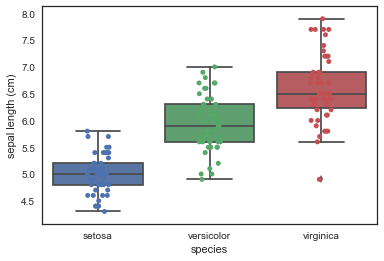

In [48]:
'''
One way we can extend this box plot is to add a layer of individual points on top of each boxplot through Seaborn's striplot

using jitter=True so that all the points don't fall in single vertical lines above the species

Saving the resulting axes as ax each time causes the resulting plot to be shown on top of the previous axes

'''

ax = sns.boxplot(x="species", y="sepal length (cm)", data=iris)
ax = sns.stripplot(x="species", y="sepal length (cm)", data=iris, jitter=True, edgecolor="gray")

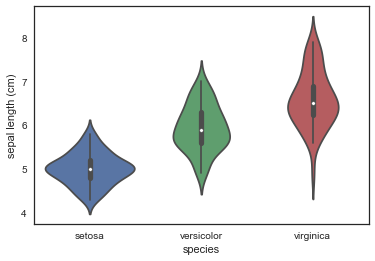

In [50]:
#A violin plot combines the benefits of the previous two plots and simplifies them
#Denser regions of the data are fatter, and sparser thiner in a violin plot

sns.violinplot(x="species", y="sepal length (cm)", data=iris, size=6)

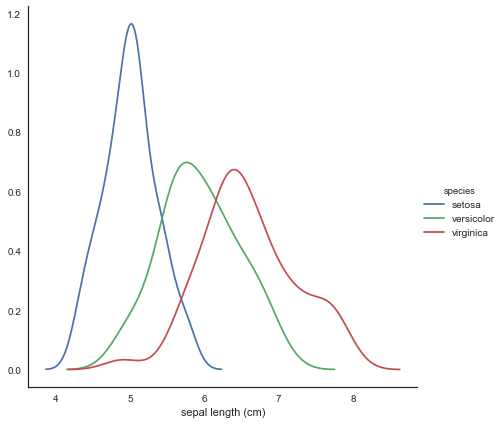

In [51]:
#A final seaborn plot useful for looking at univariate relations is the kdeplot
#Kdeplot creates and visualizes a kernel density estimate of the underlying feature
#Plot basic univariant density

sns.FacetGrid(iris, hue="species", size=6) \
   .map(sns.kdeplot, "sepal length (cm)") \
   .add_legend()

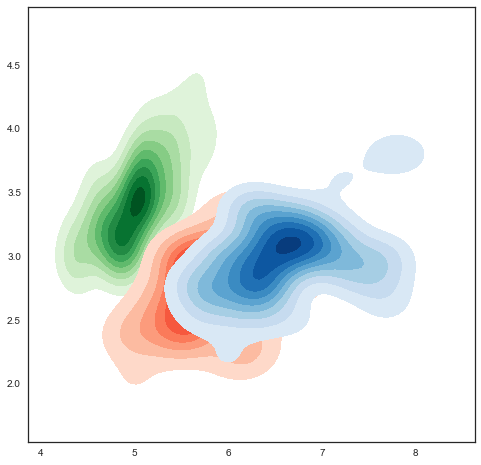

In [110]:
#Plot two shaded bivariate densities

setosa =  iris.loc[iris.species == "setosa"]
versicolor = iris.loc[iris.species == "versicolor"]
virginica = iris.loc[iris.species == "virginica"]
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.kdeplot(setosa[['sepal length (cm)','sepal width (cm)']], cmap="Greens", shade=True, shade_lowest=False)
ax = sns.kdeplot(versicolor[['sepal length (cm)','sepal width (cm)']], cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica[['sepal length (cm)','sepal width (cm)']], cmap="Blues", shade=True, shade_lowest=False)


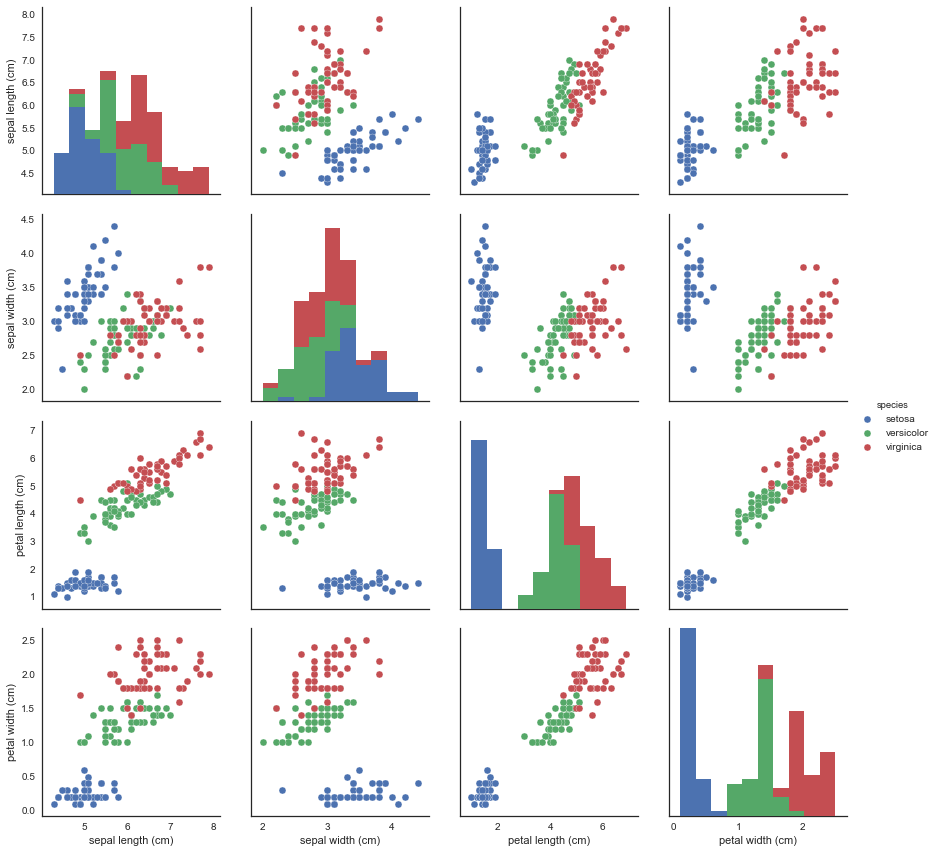

In [52]:
'''
Another useful seaborn plot is the pairplot, which shows the bivariate relation between each pair of features

From the pairplot, we'll see that the Iris-setosa species is separataed from the other two across all feature combinations

'''
sns.pairplot(iris.drop("target", axis=1), hue="species", size=3)

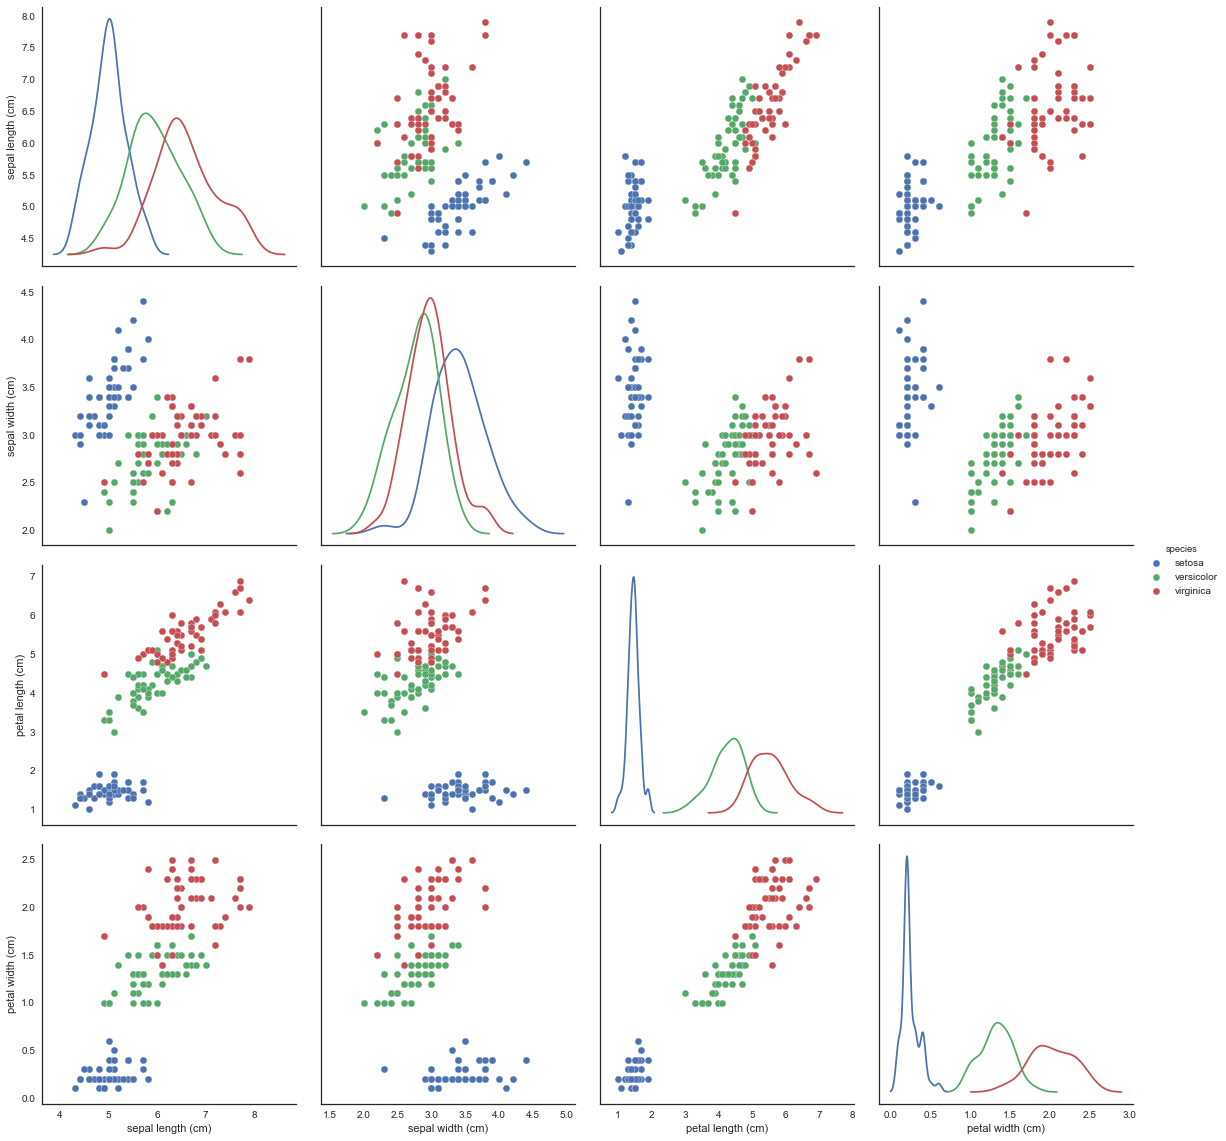

In [192]:
'''
The diagonal elements in a pairplot show the histogram by default

We can update these elements to show other things, such as a kdeplot to show univariate relation
'''
sns.pairplot(iris.drop("target", axis=1), hue="species", size=4, diag_kind="kde")

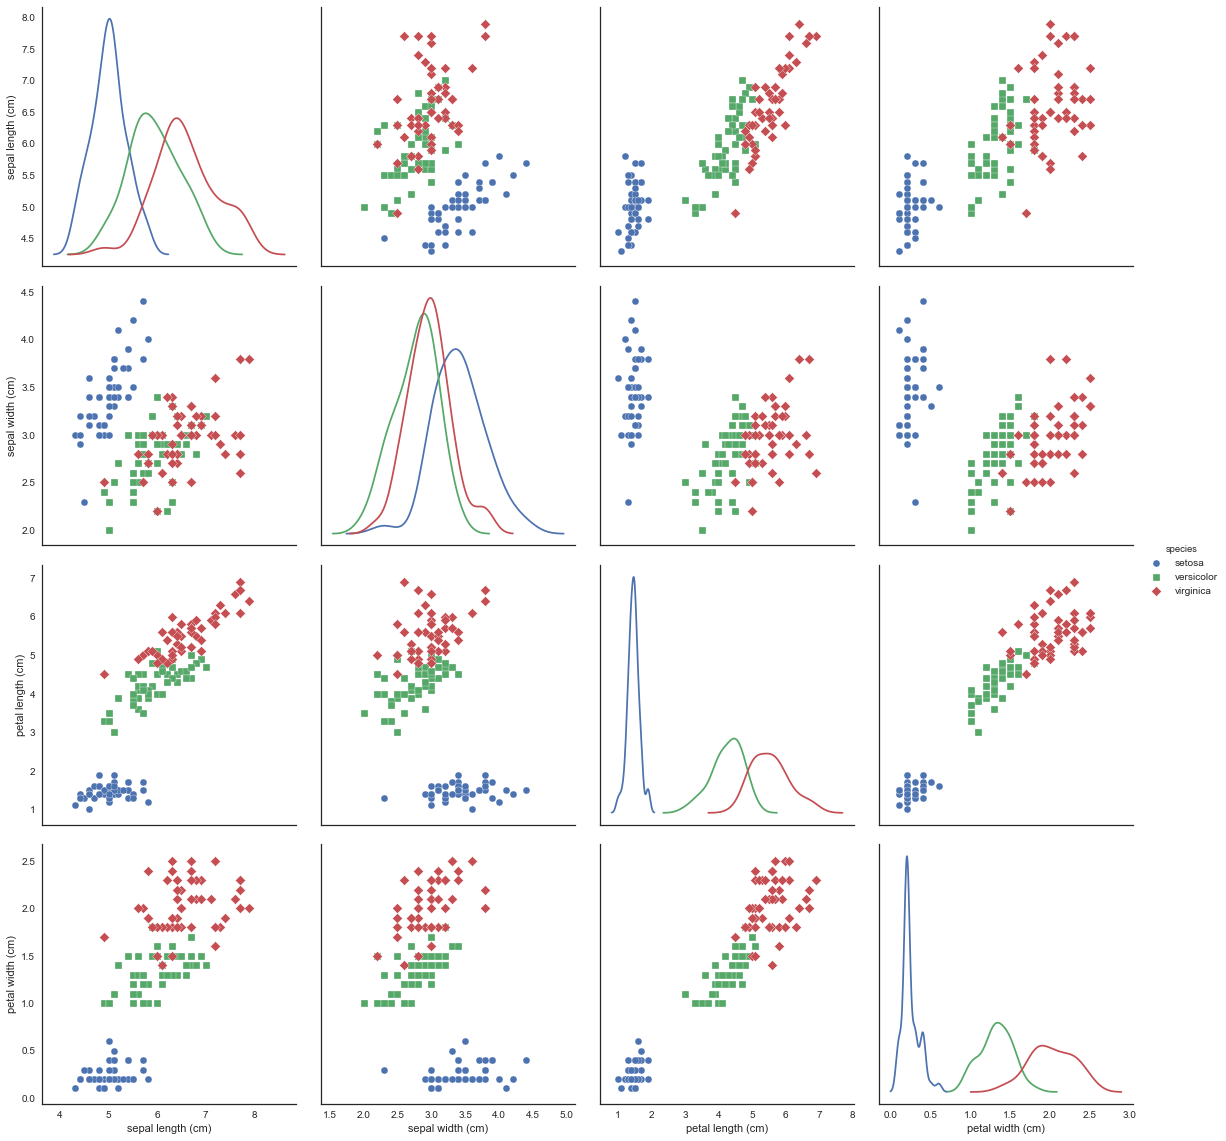

In [193]:
'''
In previous plots we use the same marker for all datapoints for 3 species.  

Besides colormap, we can also use a list of markers with the length the same as the number of levels. 

In the hue variable so that differently colored points will also have different scatterplot markers.
'''
sns.pairplot(iris.drop("target", axis=1), hue="species", size=4, diag_kind="kde",markers=["o","s","D"])

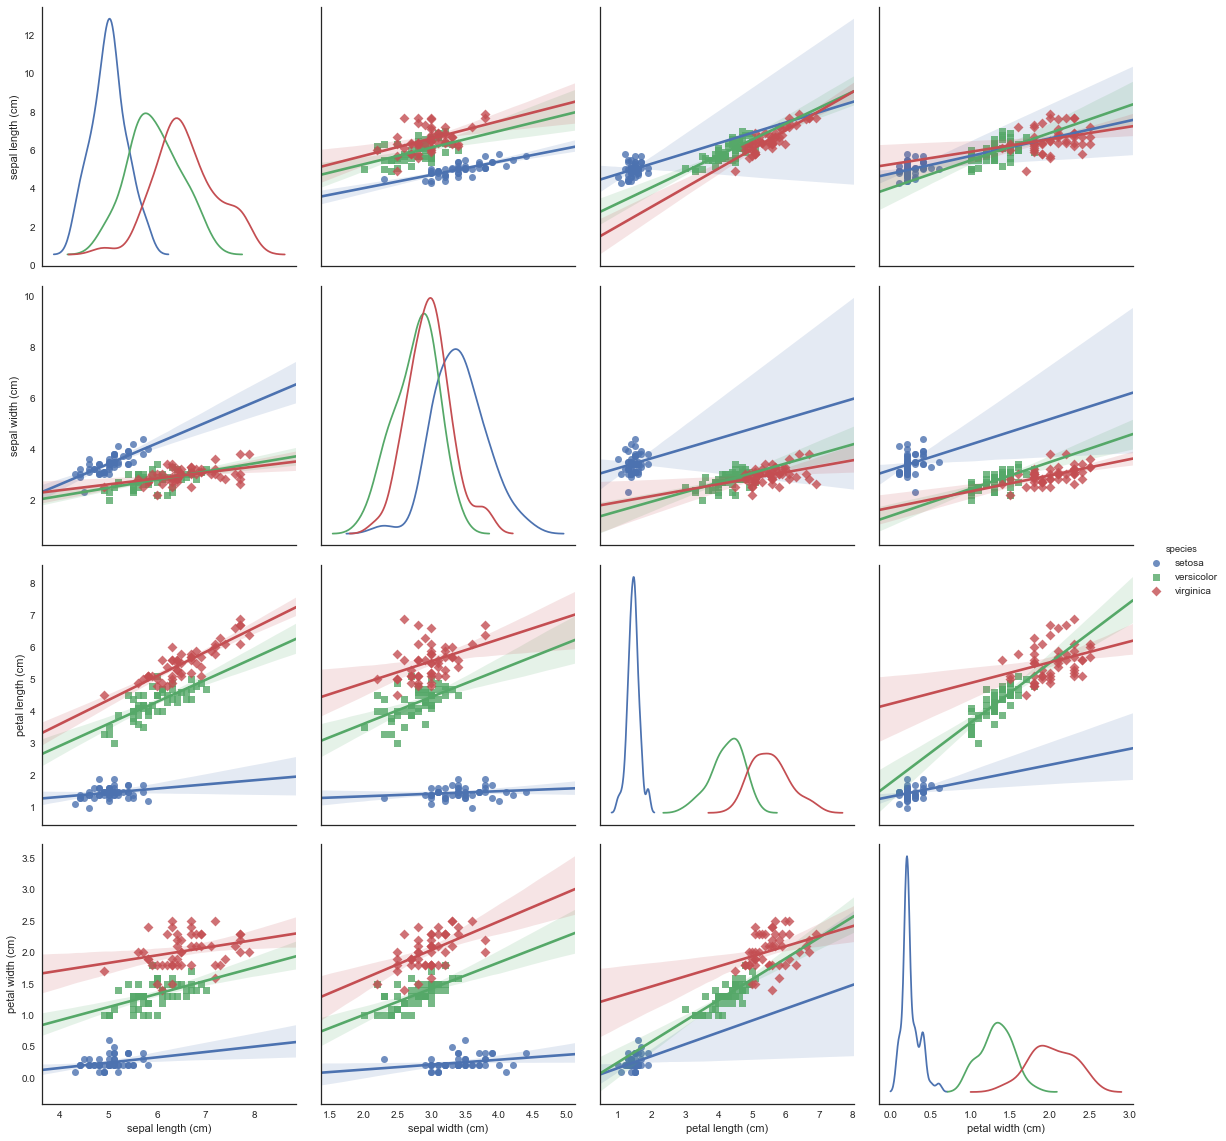

In [194]:
# we can also fit linear regression models to the scatter plots

sns.pairplot(iris.drop("target", axis=1), hue="species", size=4, diag_kind="kde",kind = "reg", markers=["o","s","D"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1261ba898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x127eb16a0>]], dtype=object)

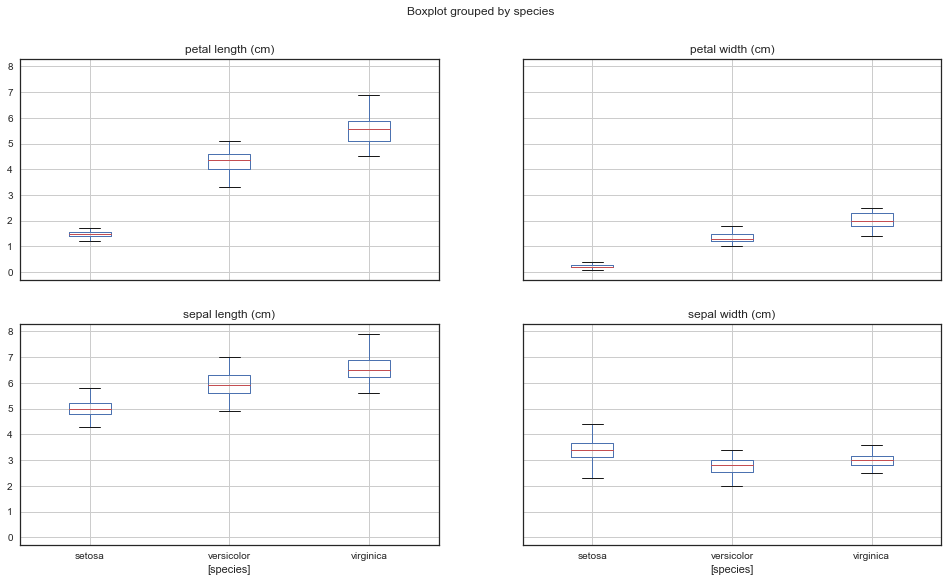

In [195]:
#We can quickly make a boxplot with Pandas on each feature, split out by species

iris.drop("target", axis=1).boxplot(by="species", figsize=(16, 9))

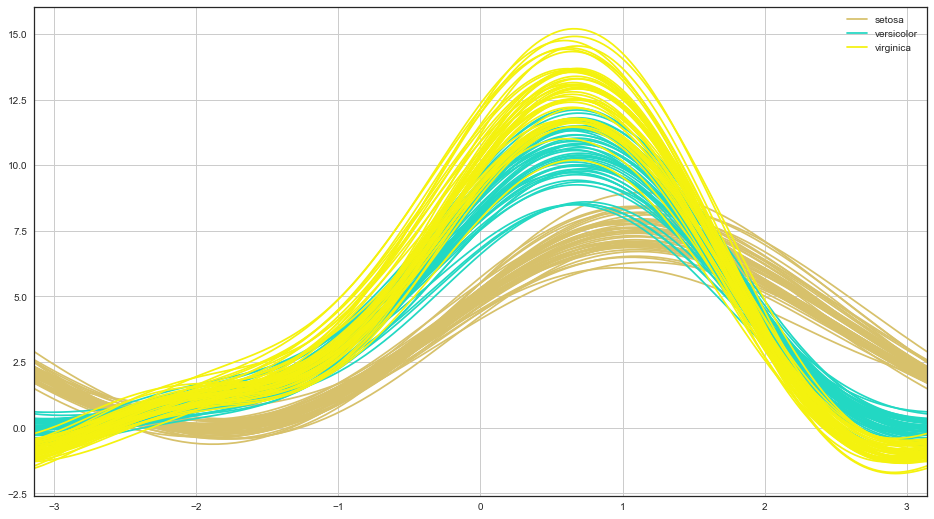

In [200]:
'''
Andrews Curves

One cool and sophisticated technique that pandas have is Andrews Curves.

Andrews curves allow the user to plot multivariate data. As a large number of curves are created using the attributes of samples as coefficients. 
By coloring these curves differently for each class, it is possible to visualize data clustering. 
Curves belonging to samples of the same class will usually be closer together and form larger structures.

In this plot, each color used represents a class and we can easily note that the lines that represent samples from 
the same class have similar curves.

'''

fig = plt.figure(1, figsize=(16, 9))
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("target", axis=1), "species")

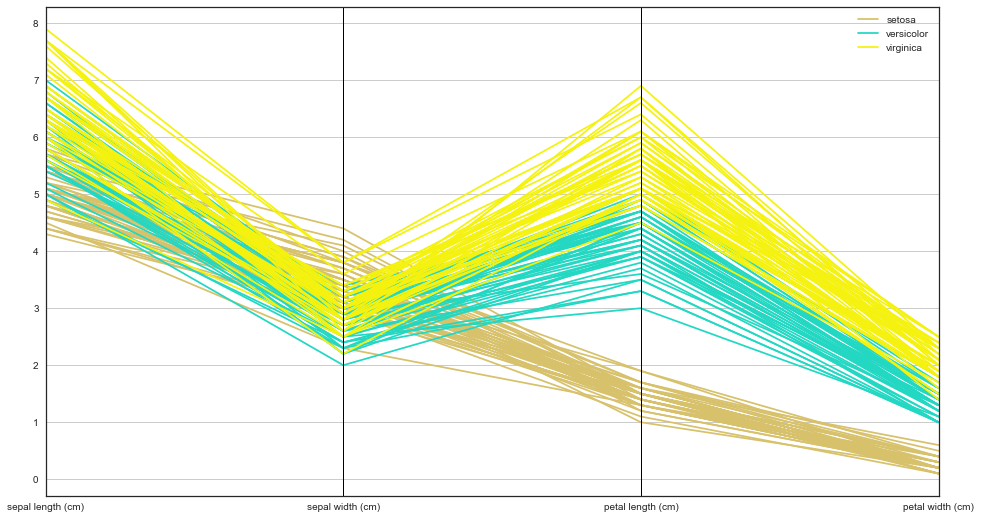

In [201]:
'''
Parallel coordinates

Parallel coordinates is a plotting technique for plotting multivariate data. 

It allows one to see clusters in data and to estimate other statistics visually. 

Using parallel coordinates points are represented as connected line segments. 
Each vertical line represents one attribute. One set of connected line segments represents one data point. 
Points that tend to cluster will appear closer together.

The main function of PCP is to highlight homogeneous groups of individuals, or conversely specific patterns of association on different variables. 
It produces an effective graphical summary of a multivariate data set, when there are not too much variables. 
Variables are automatically scaled to a fixed range (typically, 0–1) which is equivalent to working with standardized variables. 
This is to prevent the influence of one variable onto the others due to scaling issue. 

In the plot of the Iris data, it is clearly seen that species (which are shown in different colors) 
show very discriminant profiles when considering petal length and width.
Iris setosa in brown are more homogeneous with respect to their petal length. 
Therefore, setosa’s variance is lower. On the other hand Iris virginica has the largest variance as observed.

You can even use it as a backend to classification or dimension reduction techniques, like PCA. 
Most often, when performing a PCA, in addition to reducing the features space, you also want to highlight clusters of individuals

'''
fig = plt.figure(1, figsize=(16, 9))
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("target", axis=1), "species")

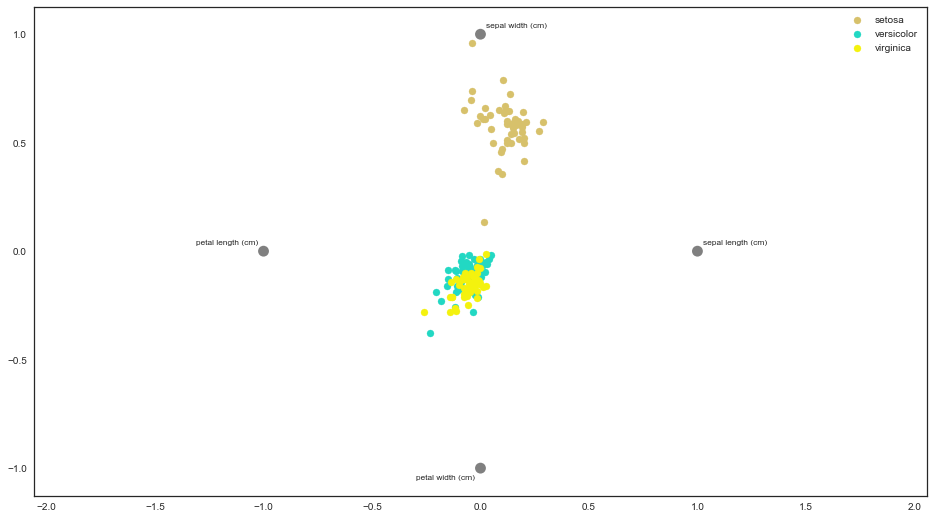

In [207]:
'''
Radviz

Another multivariate visualization technique pandas has is radviz. 
It is based on a simple spring tension minimization algorithm. 
Basically you set up a bunch of points in a plane. 
In our case they are equally spaced on a unit circle. 
Each point represents a single attribute. 
You then pretend that each sample in the data set is attached to each of these points by a spring, the stiffness of which is proportional to the numerical value of that attribute. 
Values are scaled to unit level. The point will settle in a place in the plane, where the forces acting on our sample are at an equilibrium. 
Depending on which class that sample dot belongs to, it will be colored differently.
'''

fig = plt.figure(1, figsize=(16, 9))
from pandas.tools.plotting import radviz
radviz(iris.drop("target", axis=1), "species")

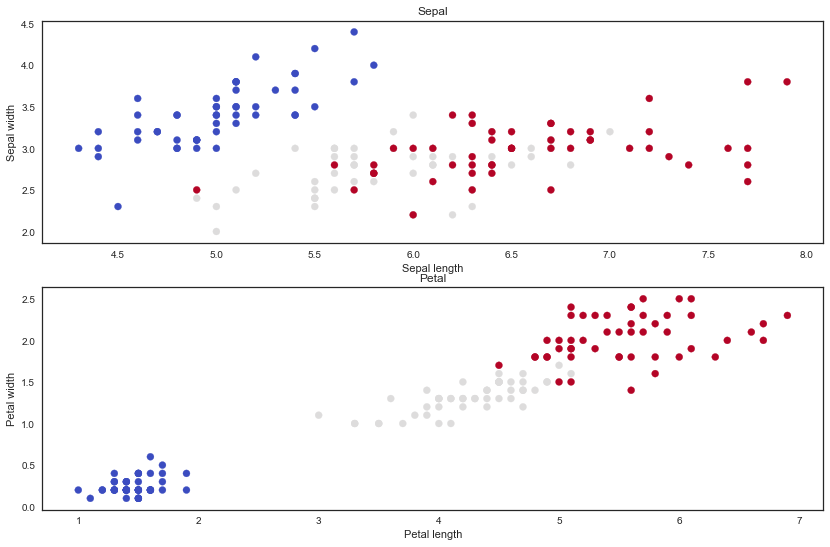

In [179]:
# let's move on to matplotlib graphic library and connect with machine learning methods 
# matplotlib can plot scatter plot with different colors as well

plt.figure(figsize=(14,9))
plt.subplot(211)
plt.scatter(iris[['sepal length (cm)']], iris[['sepal width (cm)']], c=iris['target'], cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal')
plt.subplot(212)
plt.scatter(iris[['petal length (cm)']], iris[['petal width (cm)']], c=iris['target'], cmap=plt.cm.coolwarm)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal')

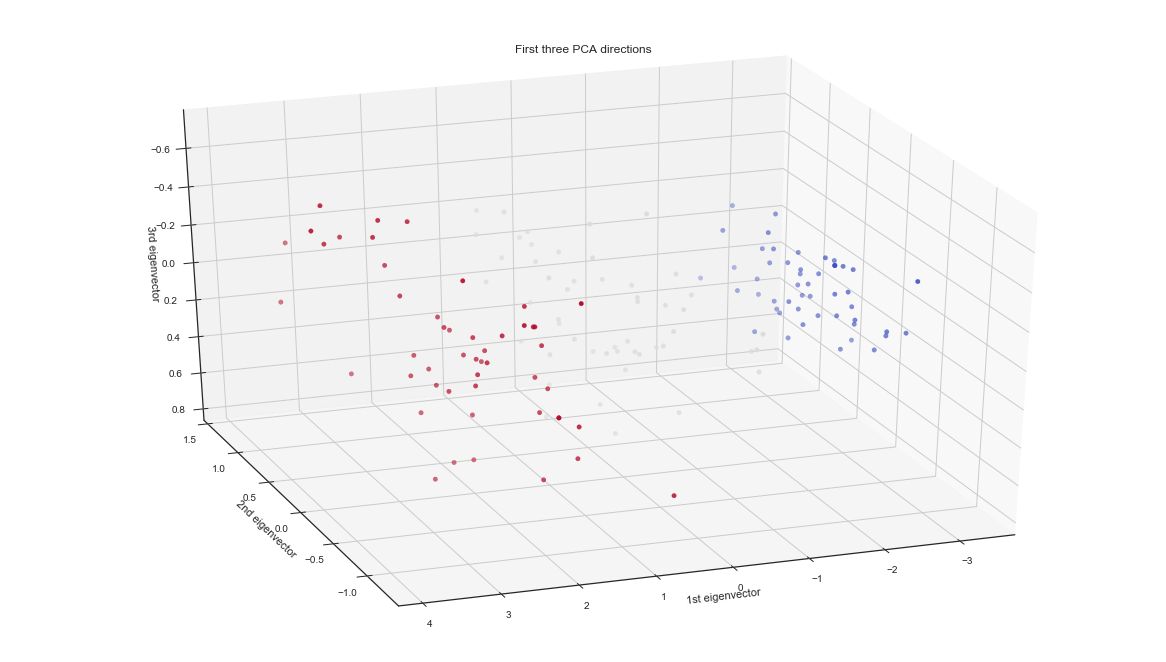

In [217]:
'''
The Iris dataset contains 3 kind of Iris flowers (Setosa, Versicolour and Virginica) and 4 attributes.

To get a better understanding of interaction of the 4 dimensions we first plot the three PCA dimensions, which is to reduce data dimensions from 4 to 3

PCA approach steps:
•	Standardize the data.
•	Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.
•	Sort eigenvalues in descending order and choose the kth eigenvectors that correspond to the kth largest eigenvalues 
where k is the number of dimensions of the new feature subspace.
•	Construct the projection matrix from the selected kth eigenvectors.
•	Transform the original dataset via projection matrix to obtain a kth-dimensional feature subspace.

'''


# Set figure size
fig = plt.figure(1, figsize=(16, 9))
ax = Axes3D(fig, elev=-150, azim=110)

# Specify number of classes
X_reduced = PCA(n_components=3).fit_transform(df.data)

# Visualize PCA eigenvector in 3-D graph
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=iris['target'],cmap=plt.cm.coolwarm)

ax.set_title("First three PCA directions")

ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

plt.show()

explained variance ratio (first two components): [ 0.92461621  0.05301557]


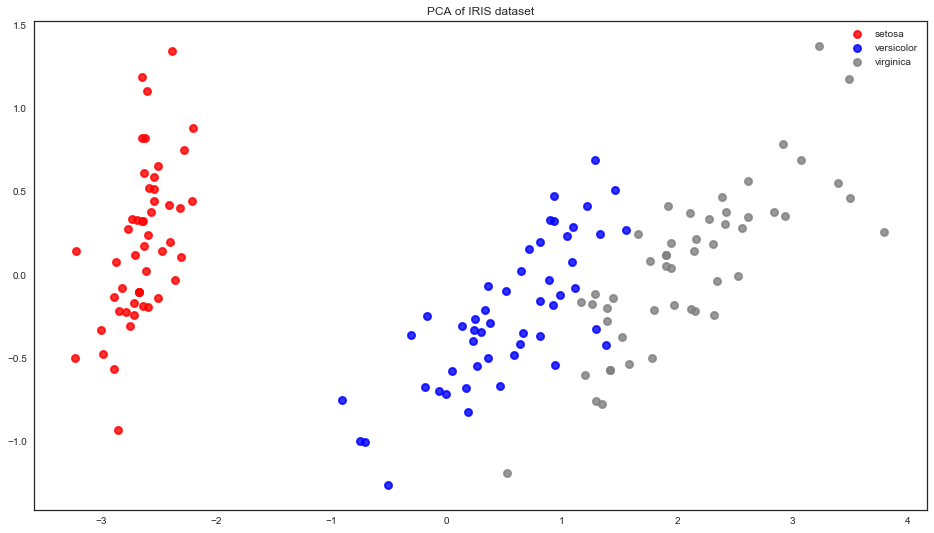

In [225]:
#We can use the PCA/KPCA or LDA to reduce data dimensions further.
#Here we visualize PCA result on the 2 first principal components.

X = dat.data
y = dat.target

target_names = dat.target_names

# Specify number of classes
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Print out the metrix: how much variance has been explained
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# Set figure size
plt.figure(figsize=(16,9))
colors = ['red', 'blue', 'grey']
lw = 2

# Visualize PCA result
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.show()

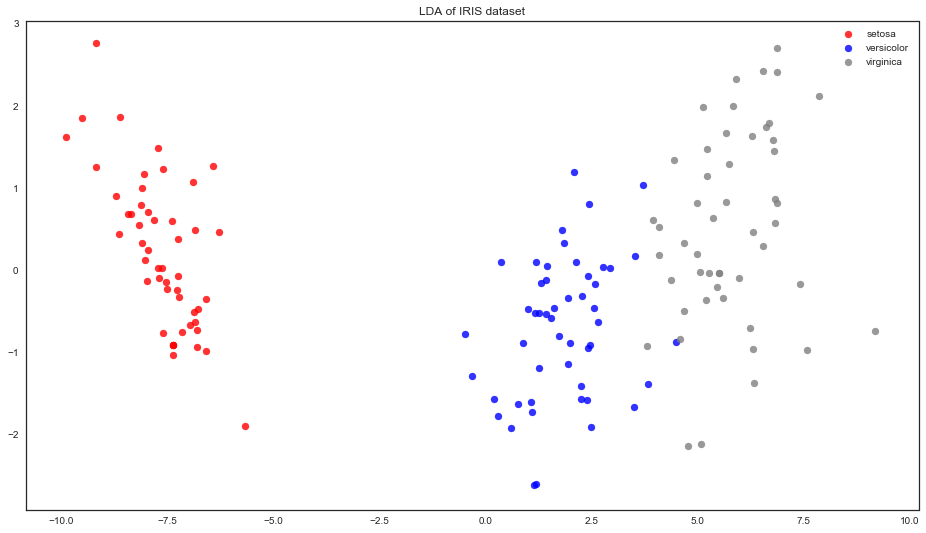

In [224]:
'''
2-D LDA

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the discrimination between two different classes.

Both Linear Discriminant Analysis (LDA) and PCA are linear transformation methods. 
PCA yields the principal components that maximize the variance of the data, 
whereas LDA also aims to find the directions that maximize the discrimination between different classes, 
which can be useful in pattern classification problem, 
while PCA “ignores” class labels. 

In other words, PCA projects the entire dataset onto a different feature subspace, 
and LDA tries to determine a suitable feature subspace in order to distinguish between patterns that belong to different classes.

In particular, LDA is a supervised method, using known class label and distinguish patterns belong to different classes.

'''

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Specify number of classes
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Set figure size
plt.figure(figsize=(16,9))

# Visualize LDA result
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

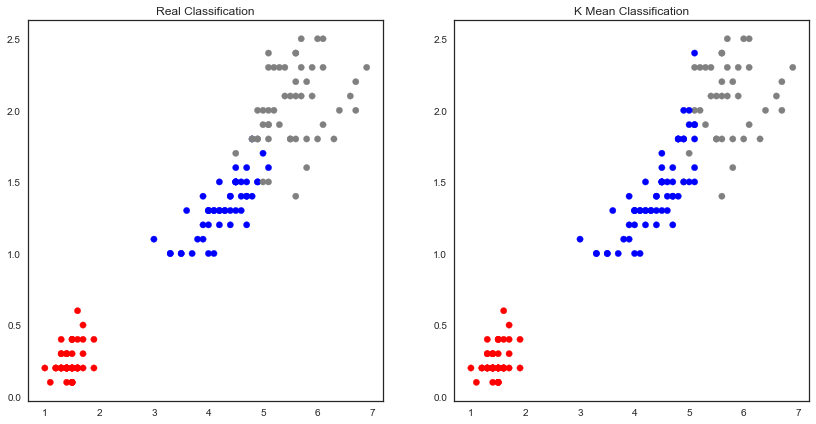

In [209]:
'''
k-Means Cluster

Clustering is defined as splitting the observations into well-separated groups.

Given the iris dataset, as we knew that there were 3 types of iris, but we don’t have no access to label them. 
We could try a clustering task.

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. 
In k means clustering, we have to specify the number of clusters we want the data to be grouped into. 
The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. 
Then, the algorithm iterates through two steps:
1.	Reassign data points to the cluster whose centroid is closest.
2.	Calculate new centroid of each cluster.

These two steps are repeated till the within cluster variation cannot be reduced any further. 
The within cluster variation is calculated as the sum of the euclidean distance between the data points 
and their respective cluster centroids.

There is absolutely no guarantee of recovering a ground truth. First, choosing the right number of
clusters is hard. Second, the algorithm is sensitive to initialization, and can fall into local minimum, 
instead of global minimum values.

'''

model = KMeans(n_clusters=3)
model.fit(dat.data)

# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red', 'blue', 'grey'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(iris[['petal length (cm)']], iris[['petal width (cm)']], c=colormap[iris['target']],cmap=plt.cm.coolwarm,s=40)
plt.title('Real Classification')

# Plot the K-Means Classifications
plt.subplot(1, 2, 2)
plt.scatter(iris[['petal length (cm)']], iris[['petal width (cm)']], c=colormap[model.labels_],cmap=plt.cm.coolwarm,s=40)
plt.title('K Mean Classification')

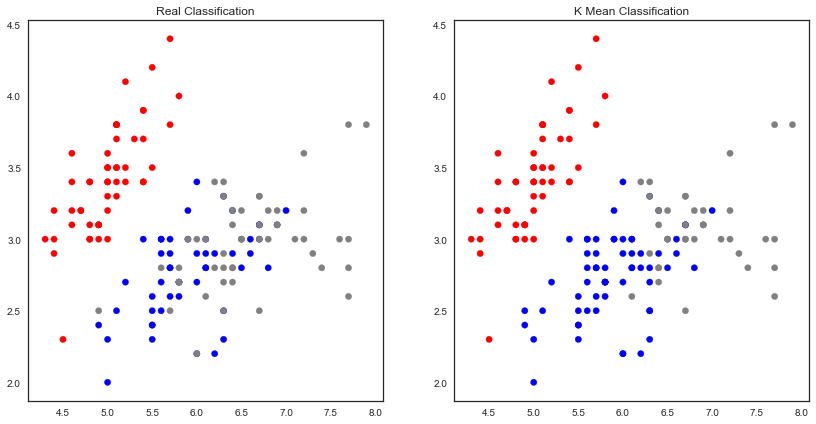

In [211]:
# K-means model & classifier results
model = KMeans(n_clusters=3)
model.fit(dat.data)

# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red', 'blue', 'grey'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(iris[['sepal length (cm)']], iris[['sepal width (cm)']], c=colormap[iris['target']],cmap=plt.cm.coolwarm,s=40)
plt.title('Real Classification')

# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(iris[['sepal length (cm)']], iris[['sepal width (cm)']], c=colormap[model.labels_],cmap=plt.cm.coolwarm,s=40)
plt.title('K Mean Classification')


DecisionTree with features [0, 1] has a score of 0.926666666667
RandomForest with 30 estimators with features [0, 1] has a score of 0.926666666667
ExtraTrees with 30 estimators with features [0, 1] has a score of 0.926666666667
AdaBoost with 30 estimators with features [0, 1] has a score of 0.84
DecisionTree with features [0, 2] has a score of 0.993333333333
RandomForest with 30 estimators with features [0, 2] has a score of 0.993333333333
ExtraTrees with 30 estimators with features [0, 2] has a score of 0.993333333333
AdaBoost with 30 estimators with features [0, 2] has a score of 0.993333333333
DecisionTree with features [2, 3] has a score of 0.993333333333
RandomForest with 30 estimators with features [2, 3] has a score of 0.993333333333
ExtraTrees with 30 estimators with features [2, 3] has a score of 0.993333333333
AdaBoost with 30 estimators with features [2, 3] has a score of 0.993333333333


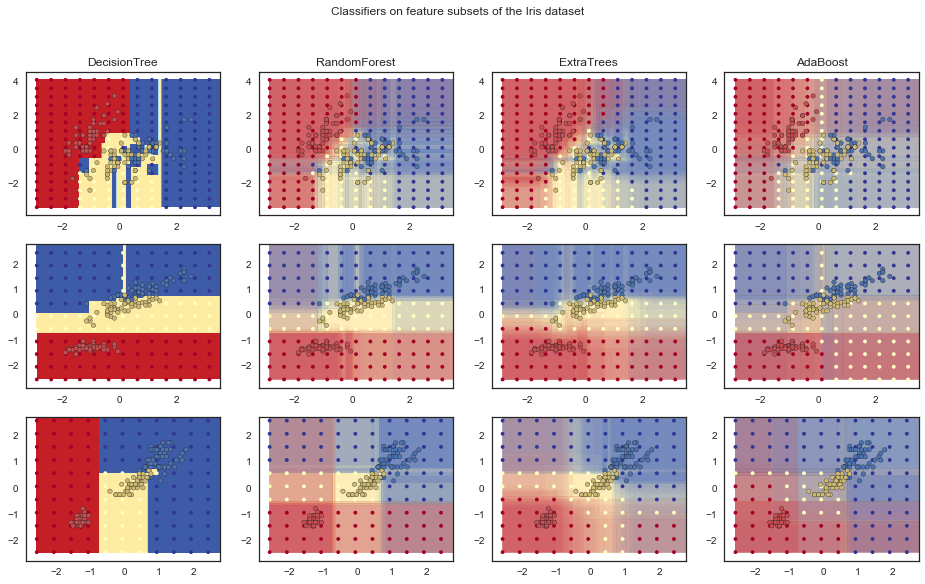

In [232]:
#Following machine learning algorithm only take features: sepal length & sepal width

#Ensemble method
from matplotlib.colors import ListedColormap
from sklearn import clone
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5 
RANDOM_SEED = 13  # to get the same result for every run

plot_idx = 1

# Set up model
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]

plt.figure(figsize=(16,9))
for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:

        X = dat.data[:, pair]
        y = dat.target
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train model
        clf = clone(model)
        clf = model.fit(X, y)

        scores = clf.score(X, y)
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")

        # Plot the training points
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)
        plot_idx += 1 

plt.suptitle("Classifiers on feature subsets of the Iris dataset")
plt.axis("tight")

plt.show()

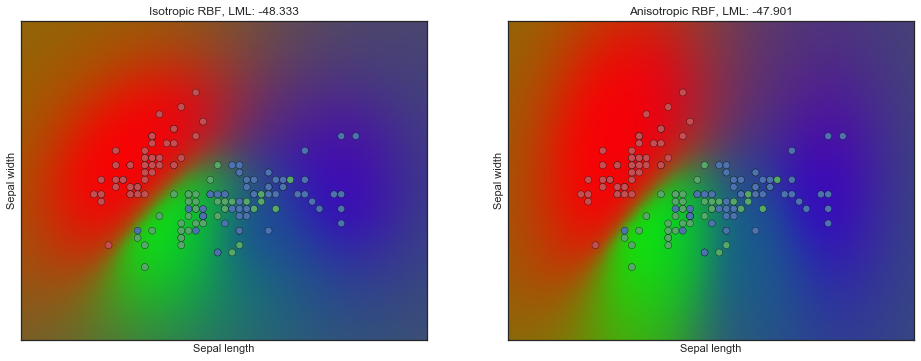

In [241]:
#Gaussian process for machine learning

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

X = dat.data[:, :2] 
y = np.array(iris.target, dtype=int)

h = .02 

kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

# create a plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(16, 9))
for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    plt.subplot(1, 2, i + 1)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y],
                edgecolors=(0, 0, 0))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("%s, LML: %.3f" %
              (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta)))

plt.legend()
plt.show()


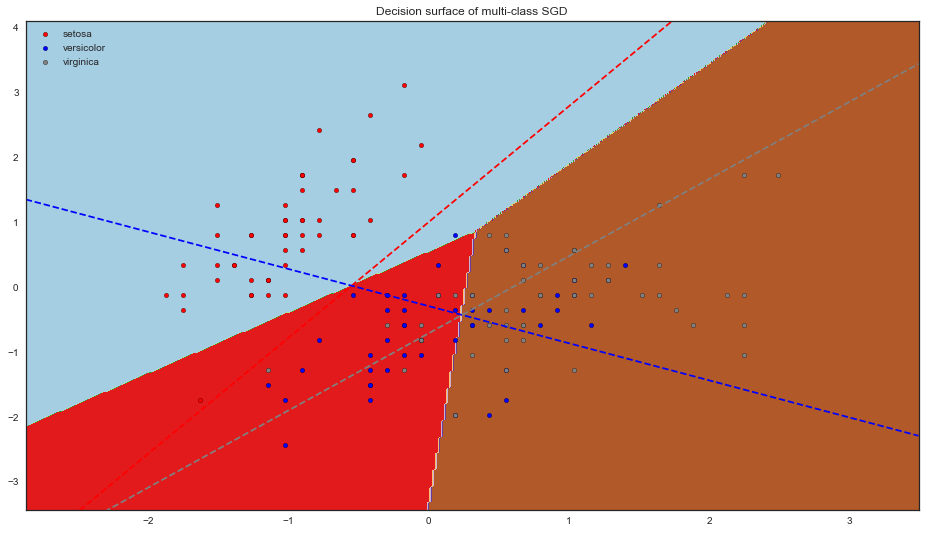

In [242]:
#Plot decision surface of multi-class SGD on iris dataset. 

from sklearn.linear_model import SGDClassifier
plt.figure(figsize=(16, 9))

idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

h = .02 

clf = SGDClassifier(alpha=0.001).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=dat.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

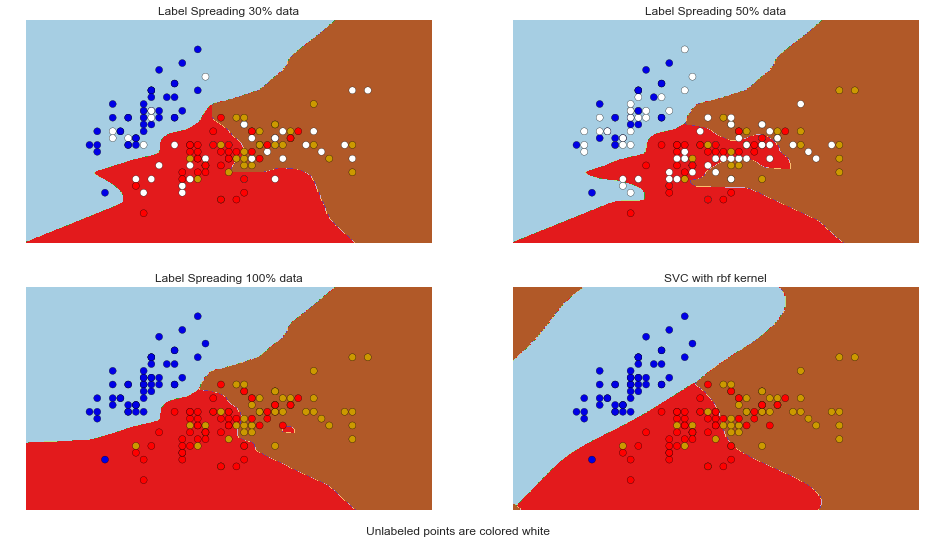

In [244]:
#Decision boundary of label propagation versus SVM on the Iris dataset

from sklearn import svm
from sklearn.semi_supervised import label_propagation
plt.figure(figsize=(16, 9))

rng = np.random.RandomState(0)

h = .02

y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3] = -1
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5] = -1

ls30 = (label_propagation.LabelSpreading().fit(X, y_30),
        y_30)
ls50 = (label_propagation.LabelSpreading().fit(X, y_50),
        y_50)
ls100 = (label_propagation.LabelSpreading().fit(X, y), y)
rbf_svc = (svm.SVC(kernel='rbf').fit(X, y), y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
titles = ['Label Spreading 30% data',
          'Label Spreading 50% data',
          'Label Spreading 100% data',
          'SVC with rbf kernel']
color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}
for i, (clf, y_train) in enumerate((ls30, ls50, ls100, rbf_svc)):
    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')
    plt.title(titles[i])

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

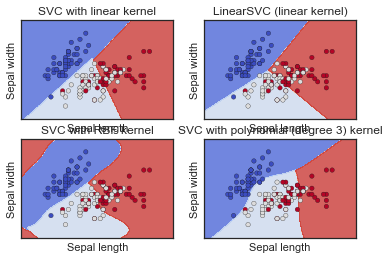

In [257]:
#Plot the decision surface for four SVM classifiers with different kernels.

from sklearn import svm

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')
plt.figure(figsize=(16, 9))
fig, sub = plt.subplots(2, 2)
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()